In [6]:
## Loading packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [7]:
## Subtask 1:  Data Preparation

np.random.seed(2)

# Loading data
dataRaw = sklearn.datasets.fetch_california_housing()

X = dataRaw['data']
Y = dataRaw['target']

# Getting feature names of the data
featureNames = dataRaw['feature_names']
print(featureNames)

# Shuffling array 
X, Y = shuffle(X, Y, random_state=2)

# Scaling data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting data to training and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.7)


"""
# Test 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
"""

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


'\n# Test \nprint(x_train.shape)\nprint(x_test.shape)\nprint(y_train.shape)\nprint(y_test.shape)\n'

In [8]:
#Fit a least squares linear regression model to the training data.  
#Compute the MSE on the training andtest data and report it.  

lr = linear_model.LinearRegression(fit_intercept = False)
lr.fit(X_train, y_train)

y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

trainMSE = metrics.mean_squared_error(y_train, y_hat_train, squared=True)
testMSE = metrics.mean_squared_error(y_test, y_hat_test, squared=True)

print('MSE on training data: ', trainMSE)
print('MSE on test data: ', testMSE)


MSE on training data:  0.5716339342735532
MSE on test data:  3.3876456938849655


In [12]:
#Compute polynomial features of degree 2 of the data.  
#Again, compute the MSEon the training and test data and report it.  What do you observe?

# Polynomial features
polyMaker = preprocessing.PolynomialFeatures(degree = 2, include_bias= False)
polyMaker.fit(X_train)
X_train_poly = polyMaker.transform(X_train)
X_test_poly = polyMaker.transform(X_test)

lrPoly = linear_model.LinearRegression(fit_intercept = False)
lrPoly.fit(X_train_poly, y_train)

y_hat_trainPoly = lrPoly.predict(X_train_poly)
y_hat_testPoly = lrPoly.predict(X_test_poly)

trainMSE_Poly = metrics.mean_squared_error(y_train, y_hat_trainPoly, squared=True)
testMSE_Poly = metrics.mean_squared_error(y_test, y_hat_testPoly, squared=True)

print('MSE on training data with 2nd degree polynomial features : ', trainMSE_Poly)
print('MSE on training data with 2nd degree polynomial features : ', testMSE_Poly)


MSE on training data with 2nd degree polynomial features :  0.3861065120817036
MSE on training data with 2nd degree polynomial features :  7842.091017530263


In [18]:
# Subtask 2:  Implement Cross-validation
def dataSplitter(X, y, k): 
    
    # Data preparation
    wData = np.c_[ X, y ]   
    wData = shuffle(wData, random_state=11) # for randomness in fold assignment        
    
    # Helpers
    MSEs = []
    nRowsFold = int((wData.shape[0]) / k)
    foldIndexies = []
    
    # Data splitting

    for i in range(k):
        fold = {'test': "", 
                'train': ""}
        
        if  i != (k-1):
            
            startIdxTest = (i) * nRowsFold
            endIdxTrain = (i+1) * nRowsFold
            
        if  i == (k-1):
            startIdxTest = (i) * nRowsFold
            endIdxTrain = wData.shape[0]
            
        # print((startIdxTest),(endIdxTrain))    
        testRows = list(range((startIdxTest),(endIdxTrain))) 
        trainRows = filter(lambda r: r not in testRows, list(range(0,wData.shape[0])))
        
        fold['test'] = testRows
        fold['train'] = list(trainRows)

        
        foldIndexies.append(fold)
        
                             
    return wData, foldIndexies
        

dataCV, foldIndex = dataSplitter(X_train, y_train, 10)


def polyFitterCv (data, foldIndexies, poly):
    
    MSEs = []
    
    y = data[:,-1]
    X = data[:,0:(data.shape[1]-1)]
    
    #print(y.shape, X.shape, data.shape)
    
    if(poly != 0):
        polyMaker = preprocessing.PolynomialFeatures(degree = poly, include_bias= False)
        X = polyMaker.fit_transform(X)
        
    #print(y.shape, X.shape, data.shape)
    
    
    for i in range(len(foldIndexies)):
        
        lrModel = linear_model.LinearRegression(fit_intercept = False)
        lrModel.fit(X[foldIndexies[i]['train'],:], y[foldIndexies[i]['train']])
        
        yhat = lrModel.predict(X[foldIndexies[i]['test'],:])
        MSEs.append( np.mean(( y[foldIndexies[i]['test']] - yhat)**2))
    
    return np.mean(MSEs)
        
    
for i in [1, 2]:
    if i == 1:
        print('CV assessed MSE on training data with without polynomial features is: ', 
              polyFitterCv(dataCV, foldIndex, i))
    else: 
        print('CV assessed MSE on training data with degree ',i,' polynomial features is: ', 
              polyFitterCv(dataCV, foldIndex, i))


CV assessed MSE on training data with without polynomial features is:  0.5839969625888457
CV assessed MSE on training data with degree  2  polynomial features is:  0.8808765649243016


In [22]:
# Select the best degree with respect to the MSE on the training data.
trainMSEs = []

for i in range(1,6):
    
    polyMaker = preprocessing.PolynomialFeatures(degree = i, include_bias= False)
    plyDataTrain = polyMaker.fit_transform(X_train)
    
    lrPoly = linear_model.LinearRegression(fit_intercept = False)
    lrPoly.fit(plyDataTrain, y_train)
    y_hat = lrPoly.predict(plyDataTrain)

    trainMSEs.append( metrics.mean_squared_error(y_train, y_hat, squared=True) )
    
    if i == 1:
        print('MSE on training data with without polynomial features is: ', 
              trainMSEs[-1])
    else: 
        print('MSE on training data with degree ',i,' polynomial features is: ', 
               trainMSEs[-1])






MSE on training data with without polynomial features is:  0.5716339342735532
MSE on training data with degree  2  polynomial features is:  0.3861065120817036
MSE on training data with degree  3  polynomial features is:  0.3141866146327006
MSE on training data with degree  4  polynomial features is:  0.24915199294842888
MSE on training data with degree  5  polynomial features is:  0.18394061991604793


In [24]:
# Split the training data into new training data 
# (50% of the data, chosen randomly) and 
# validationdata (the remaining 50% of the data).  
# Train linear regression models on the new (smaller) trainingset and pick the best degree with 
# respect to the MSE on the validation data.

train50MSEs = []


X_train_II, X_test_II, y_train_II, y_test_II = model_selection.train_test_split(X_train, y_train, test_size = 0.5)


for i in range(1,6):
    
    polyMaker = preprocessing.PolynomialFeatures(degree = i, include_bias= False)
    polyMaker.fit(X_train_II)
    plyDataTrain = polyMaker.transform(X_train_II)
    plyDataTest = polyMaker.transform(X_test_II)
    
    lrPoly = linear_model.LinearRegression(fit_intercept = False)
    lrPoly.fit(plyDataTrain, y_train_II)
    
    y_hat_II = lrPoly.predict(plyDataTest)

    train50MSEs.append( metrics.mean_squared_error(y_test_II, y_hat_II, squared=True) )
    
    if i == 1:
        print('MSE on test data of 50/50 split initial training data with without polynomial features is: ', 
              train50MSEs[-1])
    else: 
        print('MSE on test data of 50/50 split initial training data with degree ',i,' polynomial features is: ', 
               train50MSEs[-1])

    
    





MSE on test data of 50/50 split initial training data with without polynomial features is:  0.5826600700281771
MSE on test data of 50/50 split initial training data with degree  2  polynomial features is:  0.9117313306909769
MSE on test data of 50/50 split initial training data with degree  3  polynomial features is:  103.27103976849614
MSE on test data of 50/50 split initial training data with degree  4  polynomial features is:  94209.80703615106
MSE on test data of 50/50 split initial training data with degree  5  polynomial features is:  975246795.3283497


In [29]:
# Task 2-3

dataCV, foldIndex = dataSplitter(X_train, y_train, 10)

CV_train_MSEs = []

for i in [1, 2, 3, 4, 5]:
    CV_train_MSEs.append(polyFitterCv(dataCV, foldIndex, i)) 
    if i == 1:
        print('CV assessed MSE on initial training data with without polynomial features is: ', 
              CV_train_MSEs[-1])
    else: 
        print('CV assessed MSE on initial training data with degree ',i,' polynomial features is: ', 
              CV_train_MSEs[-1])

CV assessed MSE on initial training data with without polynomial features is:  0.5839969625888457
CV assessed MSE on initial training data with degree  2  polynomial features is:  0.8808765649243016
CV assessed MSE on initial training data with degree  3  polynomial features is:  96.6057760552713
CV assessed MSE on initial training data with degree  4  polynomial features is:  10068.172970646272
CV assessed MSE on initial training data with degree  5  polynomial features is:  5726361.798727835


In [27]:
dataCV_II, foldIndex_II = dataSplitter(X_train_II, y_train_II, 10)

CV_train_II_MSEs = []

for i in [1, 2, 3, 4, 5]:
    CV_train_II_MSEs.append(polyFitterCv(dataCV_II, foldIndex_II, i)) 
    if i == 1:
        print('CV assessed MSE on new training data with without polynomial features is: ', 
              CV_train_II_MSEs[-1])
    else: 
        print('CV assessed MSE on new training data with degree ',i,' polynomial features is: ', 
              CV_train_II_MSEs[-1])

CV assessed MSE on new training data with without polynomial features is:  0.5873764194435861
CV assessed MSE on new training data with degree  2  polynomial features is:  0.599362893138671
CV assessed MSE on new training data with degree  3  polynomial features is:  11.148826965502499
CV assessed MSE on new training data with degree  4  polynomial features is:  25864.242489869335
CV assessed MSE on new training data with degree  5  polynomial features is:  367395.8990616558


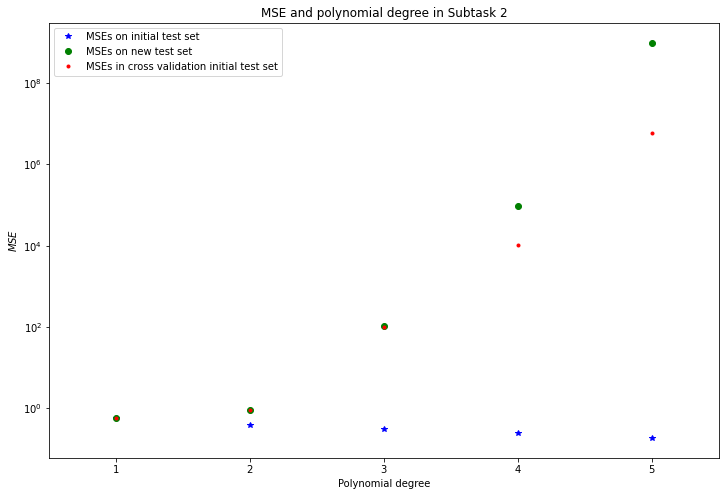

In [32]:
## Generating plot for task 2

plt.figure(figsize=(12,8))
plt.plot([1,2,3,4,5], trainMSEs, '*', c = 'b', label = 'MSEs on initial test set')
plt.plot([1,2,3,4,5], train50MSEs, 'o', c = 'g', label = 'MSEs on new test set')
plt.plot([1,2,3,4,5], CV_train_MSEs, '.', c = 'r', label = 'MSEs in cross validation initial test set')


plt.xlabel('Polynomial degree')
plt.ylabel('$MSE$')
plt.xlim((0.5, 5.5))
plt.yscale('log')
plt.title('MSE and polynomial degree in Subtask 2')
plt.legend()
